# JAX: A High-Performance Python Library

Jax is a python library developed and used by Google Research that can run numpy-like code fast using its compiler and can run on a GPU with very few changes to your code.  It also can automatically compute the gradient of functions.

This article on the [JAX Ecosystem](https://moocaholic.medium.com/jax-a13e83f49897) by Grigory Sapunov is a nice overview of jax and what it is being used for.

The [JAX reference documentation](https://jax.readthedocs.io/en/latest/index.html) will be useful, too.

## Installing

Commands I used to install jax in my anaconda distribution are the following:

      pip install --upgrade jax
      pip install --upgrade "jax[cuda111]" -f https://storage.googleapis.com/jax-release.html

      export PATH=$PATH:/usr/local/cuda/11.1/bin
      
This is on my CS account.  I believe the steps are similar to how I installed it on my Ubuntu laptop.

## From Numpy to Jax

Many `numpy` functions work just the same in `jax`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import jax.numpy as jnp
import jax

In [2]:
jax.config.update('jax_platform_name', 'cpu')
jax.config.update('jax_enable_x64', True)

In [3]:
n = 5
X = np.random.normal(size=(n, n))
X

array([[ 1.68857811,  0.05960108, -0.77075943,  0.38207014,  1.19497601],
       [ 0.66927807,  0.72811133, -2.18458535, -0.78175567, -0.85240297],
       [ 0.74290546,  0.43498539,  1.06970709, -0.9483839 , -2.22084636],
       [ 0.74023739,  0.69849817, -0.05544076, -0.1232426 ,  0.63292645],
       [-0.28035374,  1.29163498, -0.51663503, -0.90257695,  0.40760411]])

In [4]:
type(X)

numpy.ndarray

In [5]:
key = jax.random.PRNGKey(0)
Xj = jax.random.normal(key, shape=(n, n), dtype=jnp.float64)
Xj

Array([[-1.94963384e-01, -1.22714659e+00, -9.17790208e-01,
         1.45208933e-01,  1.81519776e-03],
       [-7.49586842e-01, -8.02633400e-01,  1.22429120e-01,
        -1.75889952e-01,  1.05807414e+00],
       [-2.44926166e-01, -7.76449818e-01,  4.07351856e-01,
         5.34739321e-01, -1.35932526e+00],
       [-2.18004277e+00, -2.71964285e-01,  1.36571531e+00,
         3.09982098e-01,  3.47224140e-01],
       [-3.68758371e-01,  2.74834294e-01,  1.21677907e+00,
        -2.98193408e-01, -1.75672736e+00]], dtype=float64)

In [6]:
Xj = jnp.array(X)
Xj

Array([[ 1.68857811,  0.05960108, -0.77075943,  0.38207014,  1.19497601],
       [ 0.66927807,  0.72811133, -2.18458535, -0.78175567, -0.85240297],
       [ 0.74290546,  0.43498539,  1.06970709, -0.9483839 , -2.22084636],
       [ 0.74023739,  0.69849817, -0.05544076, -0.1232426 ,  0.63292645],
       [-0.28035374,  1.29163498, -0.51663503, -0.90257695,  0.40760411]],      dtype=float64)

In [7]:
Xj

Array([[ 1.68857811,  0.05960108, -0.77075943,  0.38207014,  1.19497601],
       [ 0.66927807,  0.72811133, -2.18458535, -0.78175567, -0.85240297],
       [ 0.74290546,  0.43498539,  1.06970709, -0.9483839 , -2.22084636],
       [ 0.74023739,  0.69849817, -0.05544076, -0.1232426 ,  0.63292645],
       [-0.28035374,  1.29163498, -0.51663503, -0.90257695,  0.40760411]],      dtype=float64)

In [8]:
type(Xj)

jaxlib.xla_extension.ArrayImpl

In [9]:
X.dtype, Xj.dtype

(dtype('float64'), dtype('float64'))

In [10]:
Xj.device().device_kind

'cpu'

In [11]:
X @ X.T

array([[ 5.02286369,  1.5400277 , -2.56031462,  2.043556  ,  0.14401441],
       [ 1.5400277 ,  7.08822516,  1.11152221,  0.68196138,  2.23960447],
       [-2.56031462,  1.11152221,  7.71698465, -0.49429358, -0.2483188 ],
       [ 2.043556  ,  0.68196138, -0.49429358,  1.45470939,  1.09253834],
       [ 0.14401441,  2.23960447, -0.2483188 ,  1.09253834,  2.99461717]])

In [12]:
Xj @ Xj.T

Array([[ 5.02286369,  1.5400277 , -2.56031462,  2.043556  ,  0.14401441],
       [ 1.5400277 ,  7.08822516,  1.11152221,  0.68196138,  2.23960447],
       [-2.56031462,  1.11152221,  7.71698465, -0.49429358, -0.2483188 ],
       [ 2.043556  ,  0.68196138, -0.49429358,  1.45470939,  1.09253834],
       [ 0.14401441,  2.23960447, -0.2483188 ,  1.09253834,  2.99461717]],      dtype=float64)

Is jax any faster at this matrix multiplication?

In [15]:
%timeit X @ X.T

1.96 µs ± 3.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [16]:
%timeit Xj @ Xj.T

77.9 µs ± 327 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Disappointed?

In [17]:
n = 6000
X = np.random.normal(size=(n, n)) # .astype('float32')
Xj = jnp.array(X)  #jax.random.normal(key, shape=(n, n), dtype=jnp.float64)

In [18]:
X.dtype, Xj.dtype

(dtype('float64'), dtype('float64'))

In [19]:
def mult(A):
    return A @ A.T

In [20]:
print('numpy', X.dtype)
%timeit mult(X)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj).block_until_ready()

numpy float64
851 ms ± 1.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float64
3.18 s ± 7.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float64
3.18 s ± 13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
X = X.astype(np.float32)
Xj = Xj.astype(jnp.float32)

print('numpy', X.dtype)
%timeit mult(X)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj)

numpy float32
448 ms ± 2.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float32
857 ms ± 3.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Compiling

In [22]:
mult_jit = jax.jit(mult)
mult_jit(Xj).block_until_ready()  # run once for the compilation to be completed

Array([[6045.6074  ,  -96.01217 ,  -27.886976, ...,  -38.1436  ,
        -146.98375 ,   22.061657],
       [ -96.01217 , 6003.3267  ,  -30.438251, ...,   53.21705 ,
          65.18721 ,   19.129574],
       [ -27.886976,  -30.438251, 5961.9673  , ...,  108.88704 ,
         135.72621 ,   27.356514],
       ...,
       [ -38.1436  ,   53.21705 ,  108.88704 , ..., 6092.345   ,
         136.20265 ,   47.725765],
       [-146.98375 ,   65.18721 ,  135.72621 , ...,  136.20265 ,
        5900.9517  ,  -80.746315],
       [  22.061657,   19.129574,   27.356514, ...,   47.725765,
         -80.746315, 6106.85    ]], dtype=float32)

In [23]:
n = 6000
X = np.random.normal(size=(n, n)) # .astype('float32')
Xj = jnp.array(X)  #jax.random.normal(key, shape=(n, n), dtype=jnp.float64)

In [24]:
X.dtype, Xj.dtype

(dtype('float64'), dtype('float64'))

In [25]:
print('numpy', X.dtype)
%timeit mult(X)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj)
print('jax.numpy jit', Xj.dtype)
%timeit mult_jit(Xj)

numpy float64
849 ms ± 7.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float64
3.18 s ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy jit float64
3.13 s ± 16.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
X = X.astype(np.float32)
Xj = Xj.astype(jnp.float32)

print('numpy', X.dtype)
%timeit mult(X)
print('jax.numpy', Xj.dtype)
%timeit mult(Xj)
print('jax.numpy jit', Xj.dtype)
%timeit mult_jit(Xj)

numpy float32
486 ms ± 9.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy float32
870 ms ± 8.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
jax.numpy jit float32
842 ms ± 2.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
import time

result = []

for n in range(0, 10000, 1000):
    X = np.random.normal(size=(n, n)).astype(np.float64)
    Xj = jnp.array(X).astype(jnp.float64)
    
    start_time = time.time()
    mult(X)
    np_time64 = time.time() - start_time

    start_time = time.time()
    mult(Xj)
    jnp_time64 = time.time() - start_time

    start_time = time.time()
    mult_jit(Xj)
    jnp_jit_time64 = time.time() - start_time
        
    X = X.astype(np.float32)
    Xj = Xj.astype(jnp.float32)
    
    start_time = time.time()
    mult(X)
    np_time32 = time.time() - start_time
    
    start_time = time.time()
    mult(Xj)
    jnp_time32 = time.time() - start_time

    start_time = time.time()
    mult_jit(Xj)
    jnp_jit_time32 = time.time() - start_time

    result.append([n, np_time64, jnp_time64, jnp_jit_time64, np_time32, jnp_time32, jnp_jit_time32])

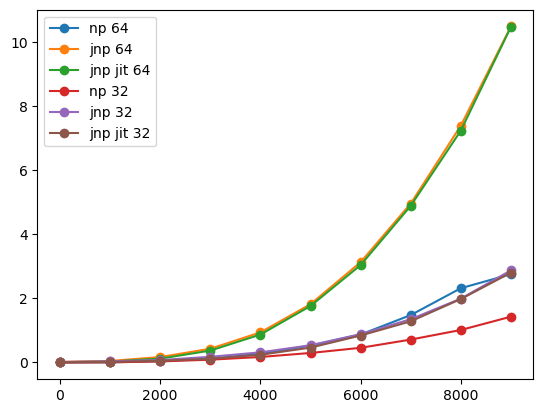

In [28]:
result = np.array(result)
plt.figure()
plt.plot(result[:, 0], result[:, 1:], 'o-', label=('np 64', 'jnp 64', 'jnp jit 64',
                                                   'np 32', 'jnp 32', 'jnp jit 32'))
plt.legend();

## JAX: The Sharp Bits

This article on [The Sharp Bits](https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html) will be helpful when you run into issues with Jax.

## Running on  a GPU

For the following config.update to have an effect, we just restart the kernel and jump down to this cell to start executing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time

import jax.numpy as jnp

import jax

#jax.config.update('jax_platform_name', 'gpu')

In [10]:
# jax.clear_backends()

In [2]:
n = 6000
X = np.random.normal(size=(n, n)).astype(np.float64)
Xj = jnp.array(X).astype(jnp.float64)
    

/tmp/ipykernel_2326745/4271190617.py:3: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  Xj = jnp.array(X).astype(jnp.float64)


In [3]:
n = 6000
X = np.random.normal(size=(n, n)).astype(np.float32)
Xj = jnp.array(X).astype(jnp.float32)
    

In [4]:
Xj.device().device_kind

'NVIDIA TITAN Xp'

In [5]:
def mult(A):
    return A @ A.T

mult_jit = jax.jit(mult)
mult_jit(Xj).block_until_ready()  # run once for the compilation to be 

Array([[ 6.05373535e+03, -7.55583191e+01,  1.01591118e+02, ...,
        -5.67661381e+00, -6.59453430e+01,  5.12776184e+00],
       [-7.55583191e+01,  6.04930859e+03, -1.79596710e+01, ...,
         4.50833435e+01,  1.68980694e+01, -4.01565094e+01],
       [ 1.01591118e+02, -1.79596710e+01,  6.00212256e+03, ...,
         1.07424545e+02,  1.39693069e+00, -1.25562111e+02],
       ...,
       [-5.67661381e+00,  4.50833435e+01,  1.07424545e+02, ...,
         5.86766504e+03,  1.53462296e+01, -9.82245789e+01],
       [-6.59453430e+01,  1.68980694e+01,  1.39693069e+00, ...,
         1.53462296e+01,  5.90022266e+03, -3.08547058e+01],
       [ 5.12776184e+00, -4.01565094e+01, -1.25562111e+02, ...,
        -9.82245789e+01, -3.08547058e+01,  5.87743701e+03]],      dtype=float32)

In [18]:
result = []

for n in range(0, 10000, 1000):
    X = np.random.normal(size=(n, n)).astype(np.float32)
    Xj = jnp.array(X).astype(jnp.float32)

    start_time = time.time()
    mult(X)
    np_time32 = time.time() - start_time
    
    mult(Xj).block_until_ready()
    
    start_time = time.time()
    mult(Xj).block_until_ready()
    jnp_time32 = time.time() - start_time

    mult_jit(Xj).block_until_ready()
    
    start_time = time.time()
    mult_jit(Xj).block_until_ready()
    jnp_jit_time32 = time.time() - start_time

    
    result.append([n, np_time32, jnp_time32, jnp_jit_time32])

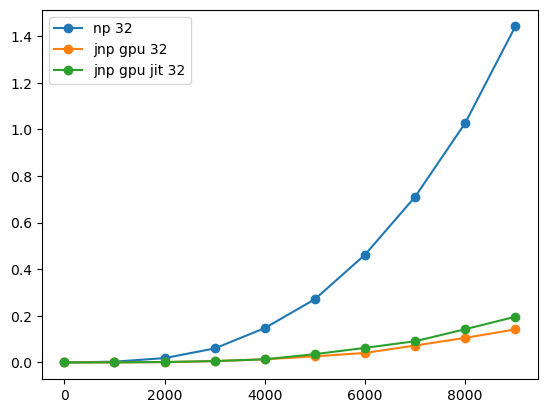

In [19]:
result = np.array(result)
plt.figure()
plt.plot(result[:, 0], result[:, 1:], 'o-', label=('np 32', 'jnp gpu 32', 'jnp gpu jit 32'))
plt.legend();

## How about some Neural Network code?

Again, restart kernel and jump to this code cell to start.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time

import jax
import jax.numpy as jnp

jax.config.update('jax_platform_name', 'cpu')

In [2]:
def init_weights():
    return[np.random.uniform(-1.0, 1.0, size=(4, 10)) / np.sqrt(4),
           np.random.uniform(-1.0, 1.0, size=(11, 1)) / np.sqrt(11)]

def nnet(Ws, X):
    Z = np.tanh(X @ Ws[0][1:, :] + Ws[0][0:1, :])
    Y = Z @ Ws[1][1:, :] + Ws[1][0:1, :]
    return Z, Y

def mse(Ws, X, T):
    _, Y = nnet(Ws, X)
    return np.mean((Y - T)**2)

def mse_grad_def(Ws, X, T):
    Z, Y = nnet(Ws, X)
    n_samples, n_outputs = T.shape
    D = -(T - Y) / (n_samples * n_outputs)
    gradients = [np.vstack((np.sum(D, axis=0), Z.T @ D))]
    D = D @ Ws[1][1:, :].T * (1 - Z ** 2)
    gradients = [np.vstack((np.sum(D, axis=0), X.T @ D))] + gradients
    return gradients

In [3]:
X = np.arange(60000).reshape((20000, 3)).astype(np.float32)
T = X[:, 0:1] / 100  #  * X[:, 1:2] / 10000

def train(X, T, Ws, n_updates, learning_rate, gf):
    for update_i in range(n_updates):
        gradients = gf(Ws, X, T)
        for W, grad in zip(Ws, gradients):
            W[:] = W - learning_rate * grad  # W -= learning_rate * grad did not work.
    # print(np.hstack((T, nnet(Ws, X)[1])))

Ws = init_weights()
start = time.time()
train(X, T, Ws, 1000, 0.01, mse_grad_def)
print('train took', time.time() - start, 'seconds')

train took 5.408488035202026 seconds


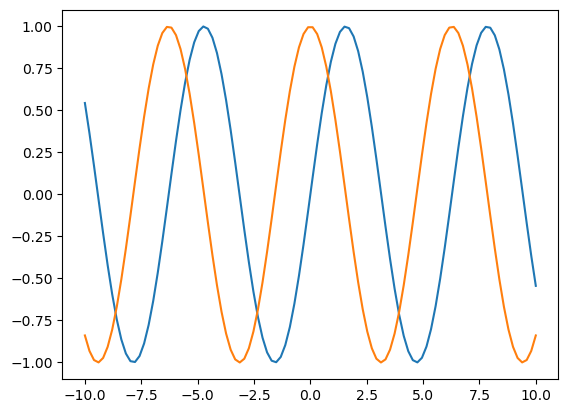

In [4]:
def f(x):
    return jnp.sin(x)

xs = jnp.linspace(-10, 10, 100)
plt.plot(xs, f(xs))

df = jax.grad(f)

plt.plot(xs, [df(x) for x in xs]);

In [5]:
def jnnet(Ws, X):
    Z = jnp.tanh(X @ Ws[0][1:, :] + Ws[0][0:1, :])
    Y = Z @ Ws[1][1:, :] + Ws[1][0:1, :]
    return Z, Y

def jmse(Ws, X, T):
    _, Y = jnnet(Ws, X)
    return jnp.mean((Y - T)**2)

jmse(Ws, X, T)
mse_grad = jax.grad(jmse)
mse_grad_jit = jax.jit(jax.grad(jmse))
mse_grad_jit(Ws, X, T);

In [6]:
n_epochs = 100

Ws = init_weights()
start = time.time()
train(X, T, Ws, n_epochs, 0.01, mse_grad_def)
np_time = time.time() - start
print('numpy took', np_time, 'seconds')

Ws = init_weights()
start = time.time()
train(X, T, Ws, n_epochs, 0.01, mse_grad)
print('jax auto took', time.time() - start, 'seconds')

Ws = init_weights()
start = time.time()
train(X, T, Ws, n_epochs, 0.01, mse_grad_jit)
compiled_time = time.time() - start
print('jax compiled auto: took', compiled_time, 'seconds')

numpy took 0.5365610122680664 seconds
jax auto took 1.5282797813415527 seconds
jax compiled auto: took 0.1112527847290039 seconds


In [7]:
print('jax compiled autograd is', np_time / compiled_time, 'times faster than numpy')

jax compiled autograd is 4.822899611682111 times faster than numpy


Now, let's run on the gpu! Again, restart the kernel and jump to this cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time

import jax
import jax.numpy as jnp

jax.config.update('jax_platform_name', 'gpu')

In [2]:
def init_weights():
    return[np.random.uniform(-1.0, 1.0, size=(4, 10)).astype(np.float32) / np.sqrt(4),
           np.random.uniform(-1.0, 1.0, size=(11, 100)).astype(np.float32) / np.sqrt(11)]

def nnet(Ws, X):
    Z = np.tanh(X @ Ws[0][1:, :] + Ws[0][0:1, :])
    Y = Z @ Ws[1][1:, :] + Ws[1][0:1, :]
    return Z, Y

def mse(Ws, X, T):
    _, Y = nnet(Ws, X)
    return np.mean((Y - T)**2)

def mse_grad_def(Ws, X, T):
    Z, Y = nnet(Ws, X)
    n_samples, n_outputs = T.shape
    D = -(T - Y) / (n_samples * n_outputs)
    gradients = [np.vstack((np.sum(D, axis=0), Z.T @ D))]
    D = D @ Ws[1][1:, :].T * (1 - Z ** 2)
    gradients = [np.vstack((np.sum(D, axis=0), X.T @ D))] + gradients
    return gradients

In [3]:
X = np.arange(60000*2).reshape((20000*2, 3)).astype(np.float32) 
T = X[:, 0:1] / 100  #  * X[:, 1:2] / 10000

def train(X, T, Ws, n_updates, learning_rate, gf):
    for _ in range(n_updates):
        gradients = gf(Ws, X, T)
        Ws = [W - learning_rate * g for (W, g) in zip(Ws, gradients)]

Ws = init_weights()
start = time.time()
train(X, T, Ws, 1000, 0.01, mse_grad_def)
print('train took', time.time() - start, 'seconds')

train took 16.458560466766357 seconds


In [4]:
Xj = jnp.array(X).astype(jnp.float32)
Tj = jnp.array(T).astype(jnp.float32)
Wsj = [jnp.array(W) for W in Ws]

def jnnet(Ws, X):
    Z = jnp.tanh(X @ Ws[0][1:, :] + Ws[0][0:1, :])
    Y = Z @ Ws[1][1:, :] + Ws[1][0:1, :]
    return Z, Y

def jmse(Ws, X, T):
    _, Y = jnnet(Ws, X)
    return jnp.mean((Y - T)**2)

jmse(Wsj, Xj, Tj)
mse_grad = jax.grad(jmse)
mse_grad_jit = jax.jit(jax.grad(jmse))
mse_grad_jit(Wsj, Xj, Tj);

In [5]:
n_epochs = 100

Ws = init_weights()
start = time.time()
train(X, T, Ws, n_epochs, 0.01, mse_grad_def)
np_time = time.time() - start
print('numpy took', np_time, 'seconds')

Ws = init_weights()
Wsj = [jnp.array(W) for W in Ws]
start = time.time()
train(Xj, Tj, Wsj, n_epochs, 0.01, mse_grad)
print('jax auto took', time.time() - start, 'seconds')

Ws = init_weights()
Wsj = [jnp.array(W) for W in Ws]
start = time.time()
train(Xj, Tj, Wsj, n_epochs, 0.01, mse_grad_jit)
compiled_time = time.time() - start
print('jax compiled auto: took', compiled_time, 'seconds')

numpy took 1.9407410621643066 seconds
jax auto took 2.207735776901245 seconds
jax compiled auto: took 0.06343841552734375 seconds


In [6]:
print('jax compiled autograd is', np_time / compiled_time, 'times faster than numpy')

jax compiled autograd is 30.592521046301865 times faster than numpy


In [7]:
jnnet(Wsj, Xj)[0].device().device_kind

'NVIDIA TITAN Xp'